In [122]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from scipy import stats
from pynwb import NWBHDF5IO
from pathlib import Path
from convnwb.io import load_nwbfile

df = pd.read_pickle('all_neur_tri_df.pkl')
df


,subj,sess,neuron,region,start_time,stop_time,RT,trial_spikes,trial_aligned_spikes,FR,stim_phase,stimulus_file,response_correct,response_confidence,actual_response
0,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,0.000000,478.855120,478.855120,"[3.43207675, 4.39507675, 5.16801325, 5.2624507...","[3.43207675, 4.39507675, 5.16801325, 5.2624507...",0.751793,encoding,bd_movie,NaN,NaN,NaN
1,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,566.346460,577.078362,10.731902,"[566.79785075, 568.845881, 569.40153725, 576.0...","[0.4513907499999732, 2.499420999999984, 3.0550...",0.372721,recognition,old015.png,1.0,2.0,5.0
2,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,578.122799,582.712578,4.589779,[582.05028225],[3.927483250000023],0.217875,recognition,new021.png,1.0,3.0,1.0
3,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,583.755203,591.685106,7.929903,[589.2551855],[5.499982499999987],0.126105,recognition,new030.png,0.0,3.0,6.0
4,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,592.728012,597.998541,5.270529,"[593.583746, 593.7849335]","[0.855733999999984, 1.0569214999999303]",0.379469,recognition,old012.png,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59444,P62,P62CS_R2,P62CS_R2_32_7_6127_3,amygdala,701.291062,704.928967,3.637905,"[701.42092175, 701.4516405, 702.1510155, 702.3...","[0.1298597500000369, 0.16057850000004237, 0.85...",4.398136,recognition,new025.png,1.0,2.0,2.0
59445,P62,P62CS_R2,P62CS_R2_32_7_6127_3,amygdala,705.992092,709.456746,3.464654,"[706.0400135, 706.19010725, 706.63710725, 706....","[0.04792150000002948, 0.19801525000002584, 0.6...",4.329437,recognition,old019.png,1.0,2.0,5.0
59446,P62,P62CS_R2,P62CS_R2_32_7_6127_3,amygdala,710.509590,712.817995,2.308405,"[710.617074, 711.48035525, 712.0430115, 712.05...","[0.10748399999999947, 0.9707652499999995, 1.53...",3.465596,recognition,old005.png,1.0,3.0,6.0
59447,P62,P62CS_R2,P62CS_R2_32_7_6127_3,amygdala,713.877932,717.207462,3.329530,"[714.04004175, 714.06579175, 714.434073, 714.6...","[0.16210975000001326, 0.18785975000002963, 0.5...",3.904455,recognition,old010.png,1.0,3.0,6.0


confirm number of subjects, neurons, trials

In [120]:
num_neurons = len(np.unique(df['neuron']))
num_subjs = len(np.unique(df['subj']))
num_sess = len(np.unique(df['sess']))
print(num_neurons, num_subjs, num_sess)


KeyError: 'unit_id_session'

In [118]:
df_recall = df[df['stim_phase'] == 'recognition']
tst = np.unique(df_recall['unit_id_session'].str[:8])
print(len(tst), tst)


29 ['P41CS_R1' 'P41CS_R2' 'P42CS_R1' 'P42CS_R2' 'P43CS_R1' 'P43CS_R2'
 'P44CS_R1' 'P47CS_R1' 'P47CS_R2' 'P48CS_R1' 'P48CS_R2' 'P49CS_R1'
 'P49CS_R2' 'P51CS_R1' 'P51CS_R2' 'P53CS_R1' 'P53CS_R2' 'P54CS_R1'
 'P54CS_R2' 'P55CS_R1' 'P55CS_R2' 'P56CS_R1' 'P56CS_R2' 'P57CS_R1'
 'P57CS_R2' 'P58CS_R1' 'P60CS_R1' 'P62CS_R1' 'P62CS_R2']


48378
47279
[0.0253680047663437, 0.0253680047663437, 0.0253680047663437, 0.0319303733941058, 0.0319303733941058, 0.0343726913367033, 0.0414827649275005, 0.0414827649275005, 0.0414827649275005, 0.0507360095326874] [38.75324982330925, 39.05178364140193, 40.36337895073532, 40.390788961356776, 40.74880193642166, 42.92873226758167, 42.94514258081514, 43.13165156600135, 44.23328317595037, 45.25608722658101]


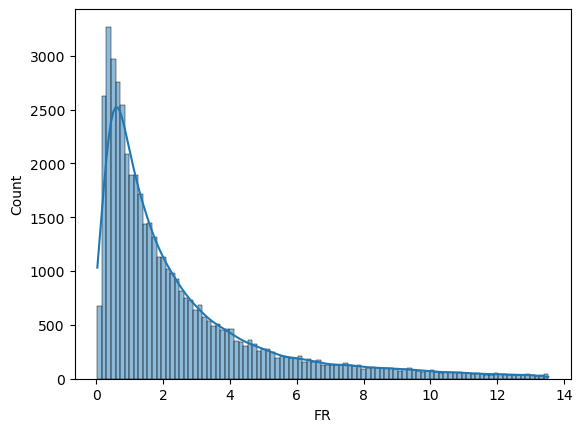

In [87]:
df_recall = df_recall[df_recall['FR'] != 0]
print(len(df_recall['FR']))
sns.histplot(df_filtered['FR'], kde=True)
z_scores = stats.zscore(df_recall['FR'])
mask = (z_scores < 3) & (z_scores > -3)
df_filtered = df_recall[mask]

print(len(df_filtered['FR']))
sorted_FRs = sorted(df_recall['FR'])
print(sorted_FRs[:10], sorted_FRs[-10:])
# sns.histplot(df_filtered['FR'], kde=True)
# plt.ylim(0, 3000)
plt.show()

             Incorrect  Correct
region                         
ACC               2460     5226
amygdala          3461    12290
hippocampus       2139     6640
preSMA            2482     7797
vmPFC             1317     4566


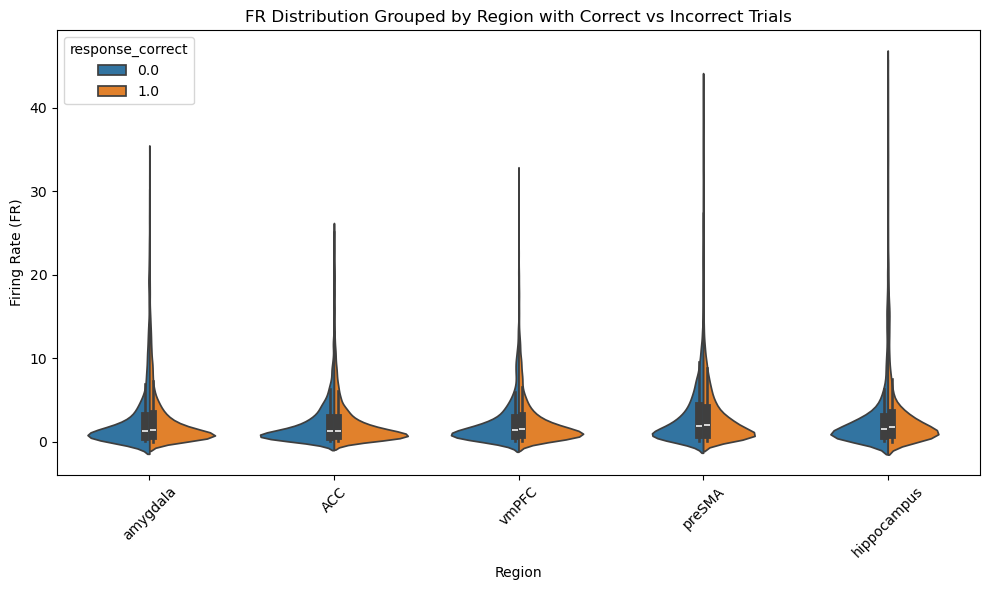

In [89]:
correct_vs_incorrect_counts = df_recall.groupby('region')['response_correct'].value_counts().unstack(fill_value=0)
correct_vs_incorrect_counts.columns = ['Incorrect', 'Correct']
print(correct_vs_incorrect_counts)

plt.figure(figsize=(10, 6))

# Plot using a violin plot with 'response_correct' hue
sns.violinplot(data=df_recall, x='region', y='FR', hue='response_correct', split=True)

# Add title and labels
plt.title('FR Distribution Grouped by Region with Correct vs Incorrect Trials')
plt.xlabel('Region')
plt.ylabel('Firing Rate (FR)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

response_category  Confident & Correct  Other
region                                       
ACC                               3673   4013
amygdala                          8040   7711
hippocampus                       4498   4281
preSMA                            5314   4965
vmPFC                             3044   2839


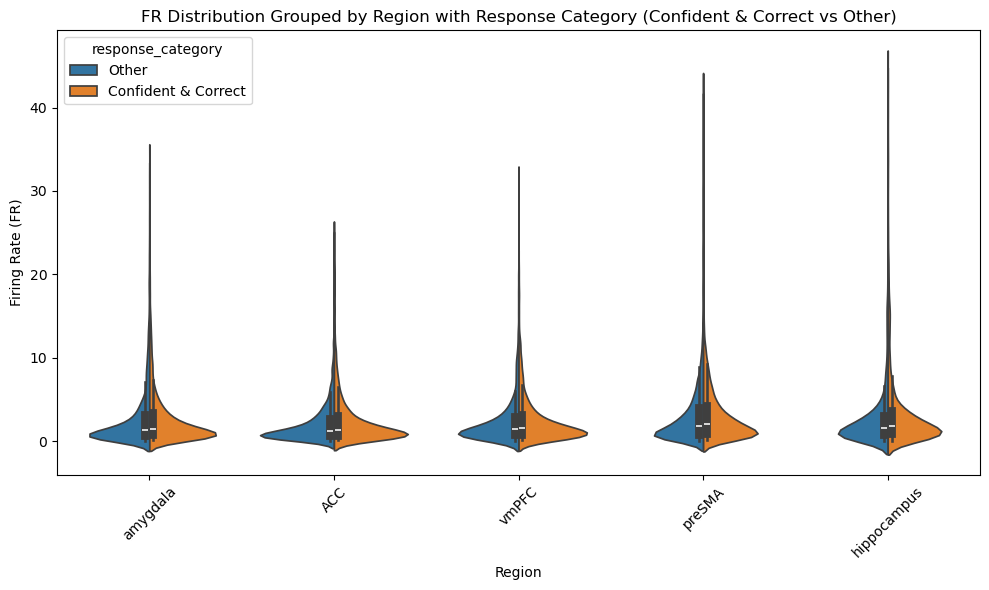

In [91]:
# Step 1: Create a new column for categorization based on the condition (response_confidence == 3 and correct == 1)
df_recall['response_category'] = df_recall.apply(lambda row: 'Confident & Correct' if row['response_confidence'] == 3 and row['response_correct'] == 1 else 'Other', axis=1)

# Step 2: Group by 'region' and sum up trials for each response category
response_category_counts = df_recall.groupby('region')['response_category'].value_counts().unstack(fill_value=0)

# Print the count of trials for each response category for each region
print(response_category_counts)

# Step 3: Plot the distribution of firing rates (FR) by 'region' with hue 'response_category'
plt.figure(figsize=(10, 6))

# Plot using a violin plot with 'response_category' hue
sns.violinplot(data=df_recall, x='region', y='FR', hue='response_category', split=True)

# Add title and labels
plt.title('FR Distribution Grouped by Region with Response Category (Confident & Correct vs Other)')
plt.xlabel('Region')
plt.ylabel('Firing Rate (FR)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()